<a href="https://colab.research.google.com/github/rafaelhsrodrigues/Imersao_Dados_Alura/blob/main/Desafios_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Desafios da Imersão a Dados - Aula 1

In [ ]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [ ]:
1 - Realizar a média da metragem para cada um dos bairros.

In [ ]:
bairros = dados.groupby("Bairro")
bairros["Metragem"].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [ ]:
2 - Duas formas de selecionar os dados por bairro

In [ ]:
#agrupar por bairro, somando as outras colunas
dados.groupby("Bairro").sum()

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,22269,292,271,256
Alto da Boa Vista,3351,33,41,37
Alto da Lapa,25313,271,326,336
Alto da Mooca,5401,66,52,73
Alto de Pinheiros,177279,1611,1979,2047
...,...,...,...,...
Vila Água Funda,761,13,11,13
Água Branca,2483,41,40,32
Água Fria,1985,34,41,30


In [ ]:
#Colocar os endereços pela ordem alfabetica de bairros
dados.sort_values(by="Bairro")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6201,Rua Oliveira Peixoto,Aclimação,São Paulo,120,3,3,8,R$ 1.250.000
3748,Rua Pais de Andrade,Aclimação,São Paulo,180,3,1,3,R$ 1.200.000
4264,Rua Albina Barbosa,Aclimação,São Paulo,130,2,3,2,R$ 1.100.000
3737,Rua Antero Mendes Leite,Aclimação,São Paulo,234,3,1,2,R$ 1.580.000
2764,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,205,2,1,1,R$ 850.000
...,...,...,...,...,...,...,...,...
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
9310,"Rua Professor Lúcio Martins Rodrigues, 3773",NaN,São Paulo,358,4,6,7,R$ 1.600.000


In [ ]:
3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.

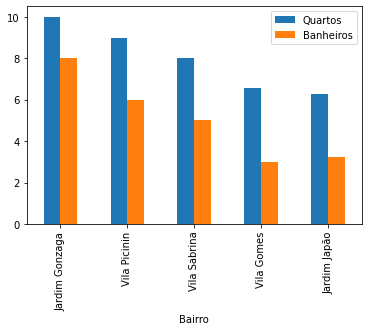

In [ ]:
#No grafico abaixo, é possivel notar que os 5 primeiros bairros com a maior media de quartos, possuem menos banheiros por quarto.
#Seria interessante verificar se estes são bairros mais baratos ou mais caros na media de "valor", se esta coluna estivesse no formato (int)
qb = dados.groupby("Bairro")[["Quartos","Banheiros"]].mean()
qb.sort_values(by="Quartos", ascending=False).head(5).plot.bar()

In [ ]:
4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max)

In [ ]:
#Os cinco bairros com a maior metragem em imoveis
dados.groupby("Bairro")[["Metragem"]].max().sort_values(by="Metragem", ascending=False).head(5)

,Metragem
Bairro,
Jardim Guedala,750000
Sítio Represa,37000
Jardim da Glória,35677
Santo Amaro,7126
Vila Castelo,2850


In [ ]:
5 - Descobrir quais são os bairros que não tem nome de rua.

In [ ]:
s_rua = dados["Rua"].isnull()
dados["Bairro"][s_rua].value_counts()


Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64